In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("salesprediction.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

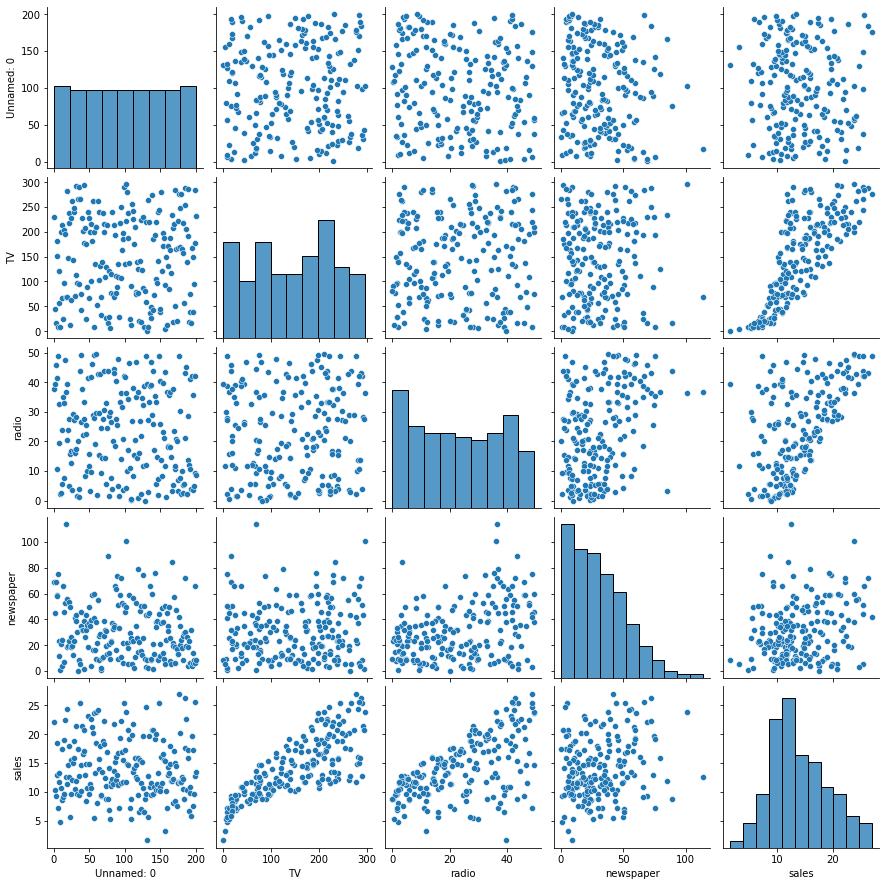

In [9]:
sns.pairplot(df)
plt.show()

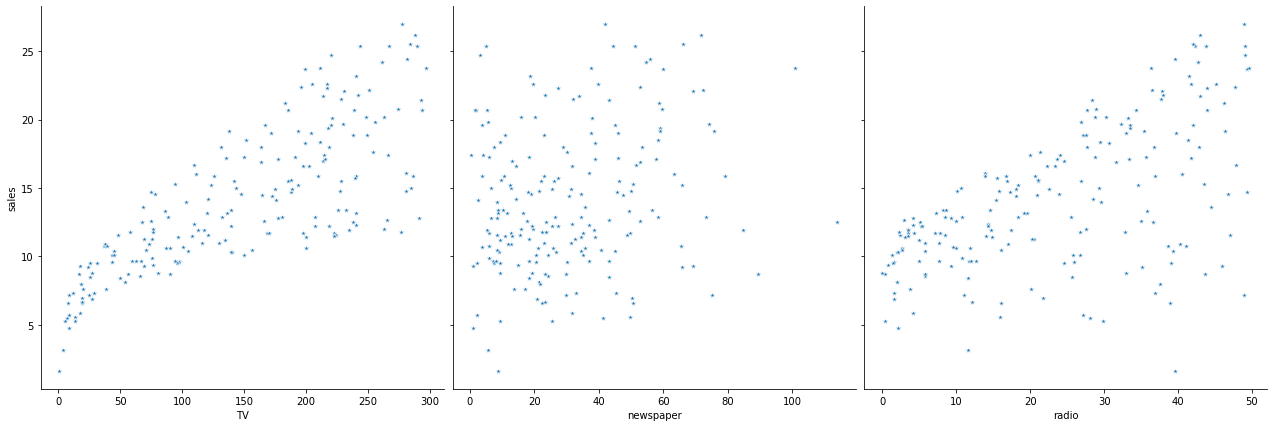

In [12]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', markers="*", size=6)
plt.show()


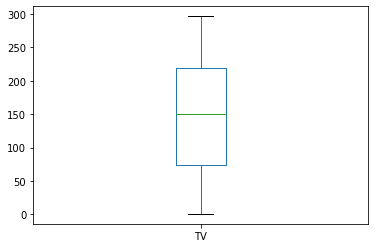

In [13]:
df.TV.plot.box()
plt.show()


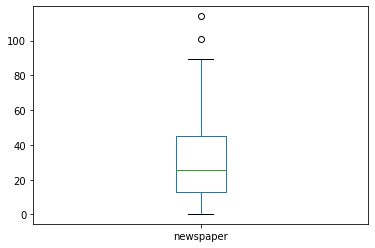

In [14]:
df.newspaper.plot.box()
plt.show()

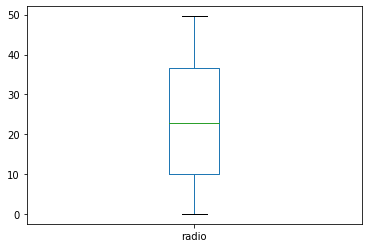

In [16]:
df.radio.plot.box()
plt.show()

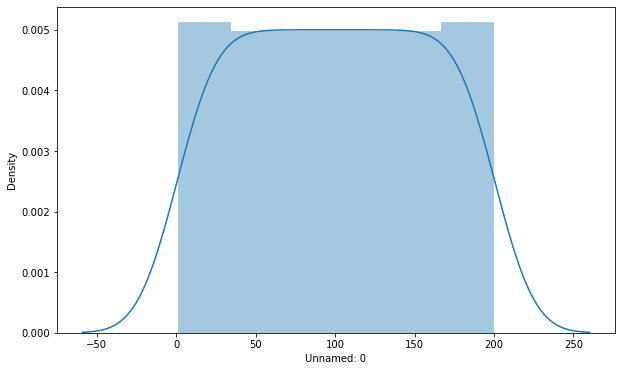

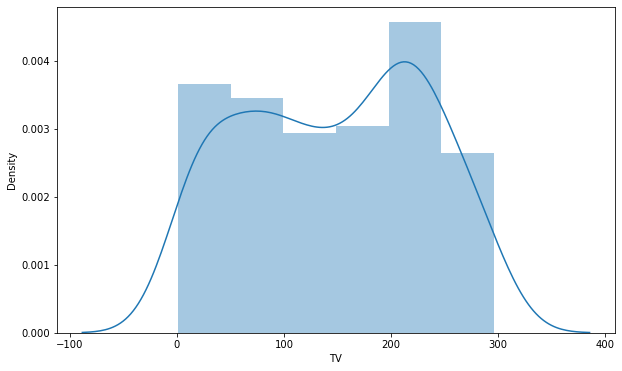

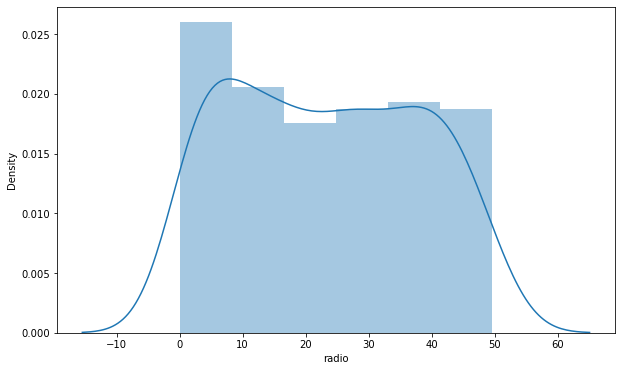

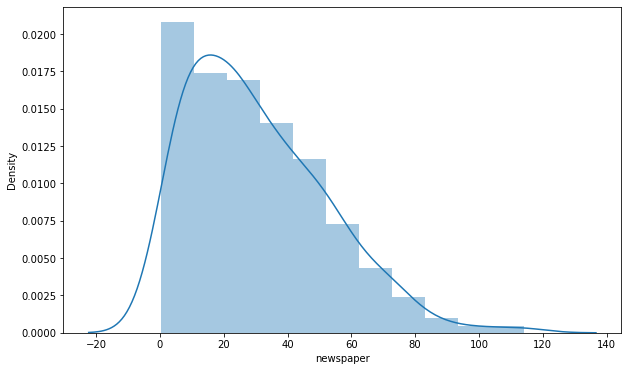

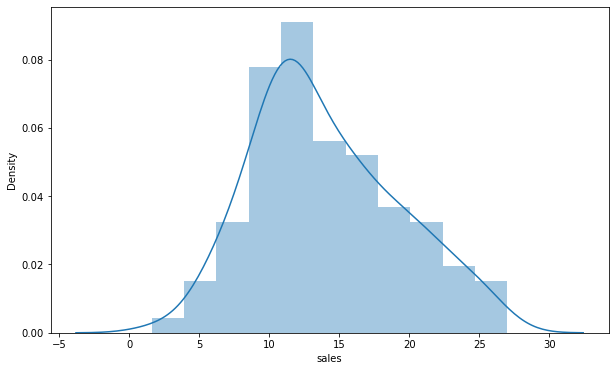

In [17]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])

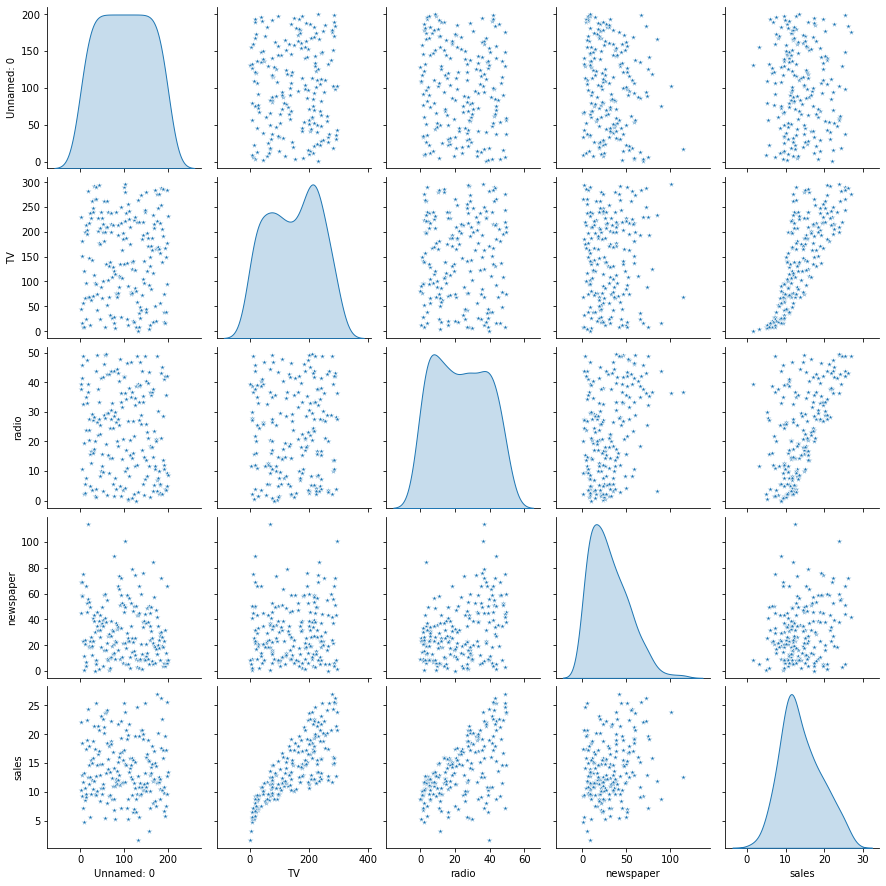

In [18]:
sns.pairplot(df, markers="*", diag_kind="kde")
plt.show()


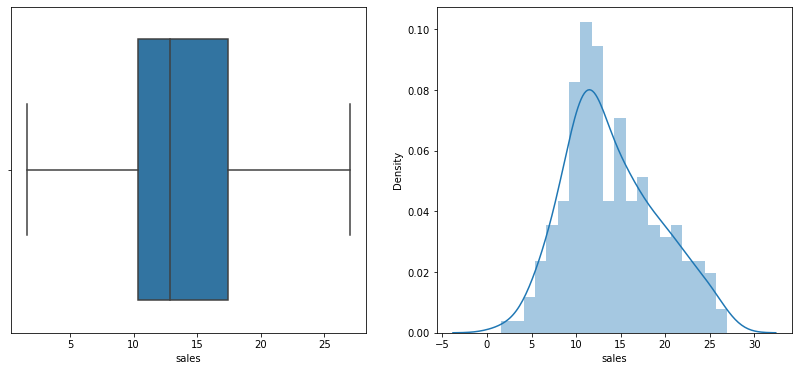

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(df.sales)
plt.subplot(1,2,2)
sns.distplot(df.sales,bins=20)
plt.show()


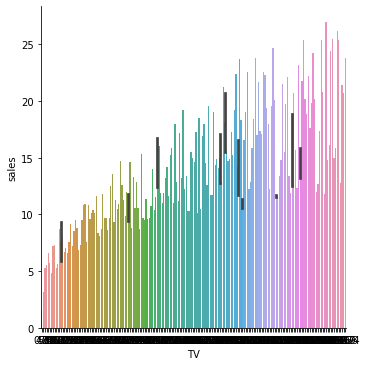

In [21]:
sns.catplot(x='TV',y='sales', kind="bar",data=df)
plt.show()

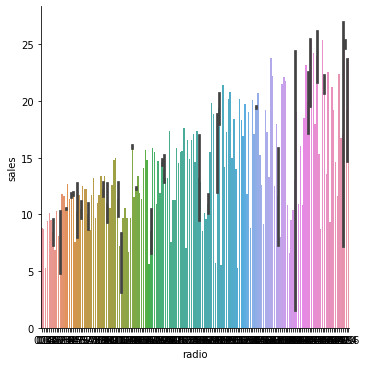

In [22]:
sns.catplot(x='radio',y='sales', kind="bar",data=df)
plt.show()

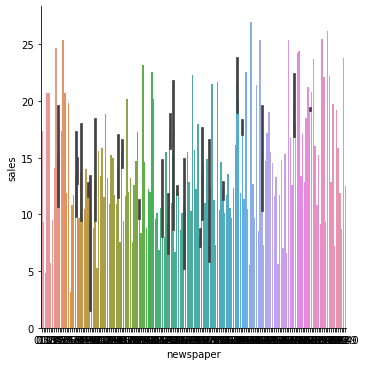

In [23]:
sns.catplot(x='newspaper',y='sales', kind="bar",data=df)
plt.show()

<Figure size 720x576 with 0 Axes>

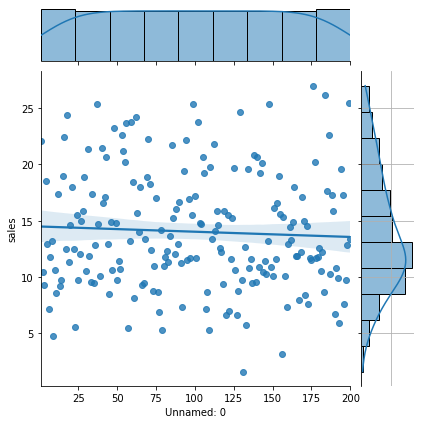

<Figure size 720x576 with 0 Axes>

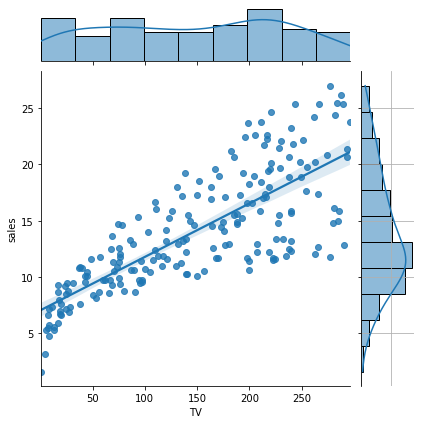

<Figure size 720x576 with 0 Axes>

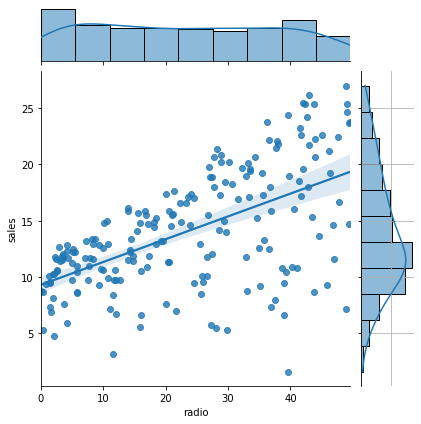

<Figure size 720x576 with 0 Axes>

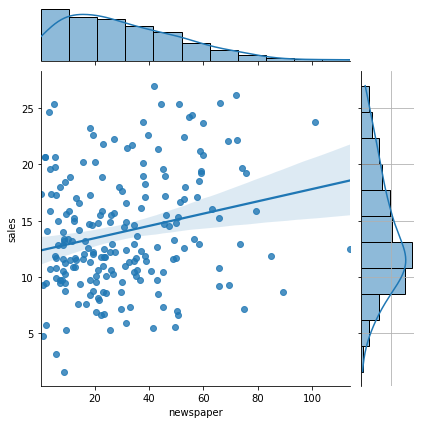

<Figure size 720x576 with 0 Axes>

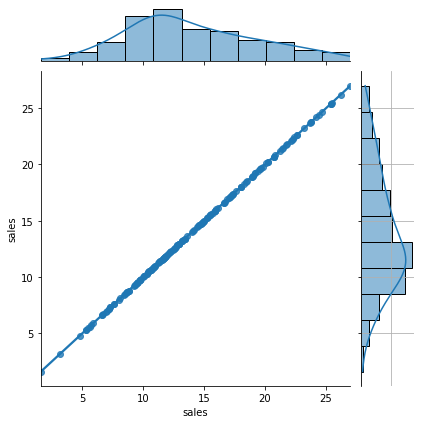

In [24]:
for col in df[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["sales"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("sales",fontsize = 15)
    plt.grid()
    plt.show()

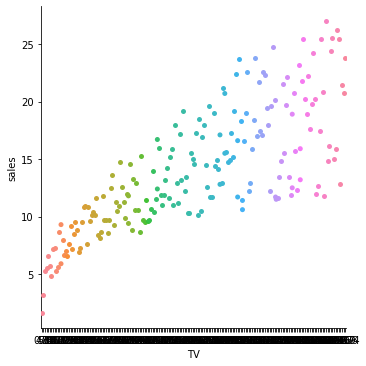

In [25]:
sns.catplot(x='TV',y='sales',data=df,kind='swarm')
plt.show()


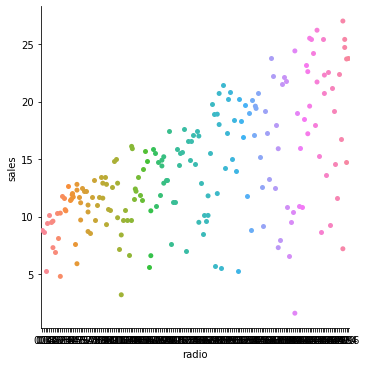

In [26]:
sns.catplot(x='radio',y='sales',data=df,kind='swarm')
plt.show()

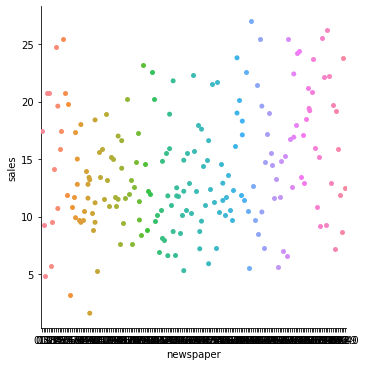

In [27]:
sns.catplot(x='newspaper',y='sales',data=df,kind='swarm')
plt.show()

In [28]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


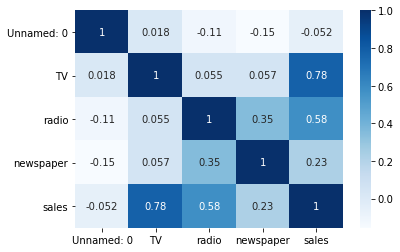

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [31]:
q = df.sales.describe()
print(q)
IQR    = q['75%'] - q['25%']
Upper  = q['75%'] + 1.5 * IQR
Lower  = q['25%'] - 1.5 * IQR
print("the upper and lower outliers are {} and {}".format(Upper,Lower))

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64
the upper and lower outliers are 27.937499999999996 and -0.16249999999999787


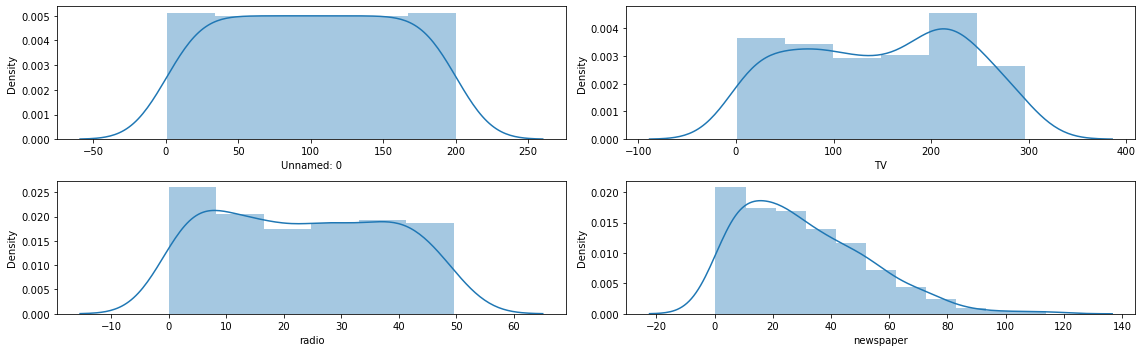

In [32]:
rows =2

cols = 2

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,5))

col = df.columns

index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index = index + 1
        
plt.tight_layout()

In [33]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
X = df.drop('sales',axis=1)
y = df[['sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [35]:
lr =LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.intercept_

array([2.72651897])

In [38]:
lr.coef_

array([[-0.00072061,  0.04545001,  0.18977137,  0.00432698]])

In [39]:
pred = lr.predict(X_test)

In [40]:
r2_score(y_test,pred)

0.9056492582804205

In [41]:
X_train_sm = sm.add_constant(X_train)

In [42]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [43]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           2.04e-64
Time:                        13:29:09   Log-Likelihood:                -280.80
No. Observations:                 140   AIC:                             571.6
Df Residuals:                     135   BIC:                             586.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7265      0.474      5.748      0.000       1.788       3.665
Unnamed: 0    -0.0007      0.003     -0.267      0.790      -0.006       0.005
TV             0.0455      0.002     26.974      0.000       0.042       0.049
radio          0.1898      0.011     16.952      0.000       0.168       0.212
newspaper      0.0043      0.008      0.569      0.570      -0.011       0.019
==============================================================================
Omnibus:                       39.963   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.057
Skew:                          -1.231   Prob(JB):                     9.21e-19
Kurtosis:                       5.860   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,radio,3.47
3,newspaper,3.27
1,TV,2.88
0,Unnamed: 0,2.52


In [45]:
X_train_sm = sm.add_constant(X_train[['TV','radio']])

In [46]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           4.46e-67
Time:                        13:30:03   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.000       1.992       3.446
TV             0.0455      0.002     27.368      0.000       0.042       0.049
radio          0.1925      0.010     18.860      0.000       0.172       0.213
==============================================================================
Omnibus:                       41.530   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.544
Skew:                          -1.255   Prob(JB):                     2.18e-20
Kurtosis:                       6.037   Cond. No.                         419.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lr = LinearRegression()

In [49]:
rfe =RFE(lr,2)

In [50]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [51]:
rfe.support_

array([False,  True,  True, False])

In [54]:
a=X_train.columns[rfe.support_]
a


Index(['TV', 'radio'], dtype='object')

In [55]:
scalar = MinMaxScaler()

In [56]:
X_train = scalar.fit_transform(X_train[a])

In [57]:
X_test = scalar.fit_transform(X_test[a])

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr.intercept_

array([2.75091317])

In [61]:
lr.coef_

array([[13.46411972,  9.5474144 ]])

In [62]:
pred = lr.predict(X_test)

In [63]:
r2_score(y_test,pred)

0.8783549128047616

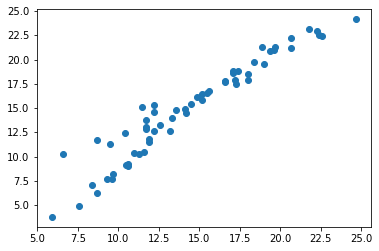

In [64]:
plt.scatter(y_test,pred)
plt.show()

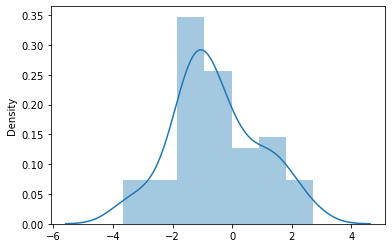

In [65]:
sns.distplot(y_test-pred)
plt.show()

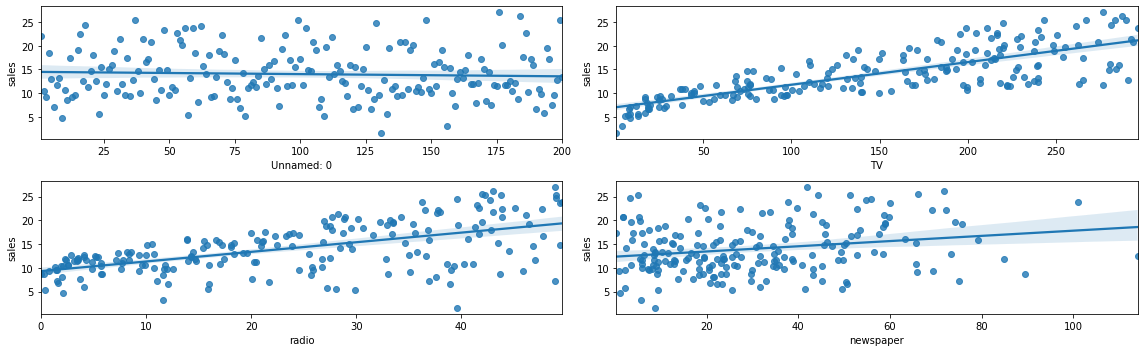

In [66]:
rows = 2
cols = 2

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,5))

col = df.columns

index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=df[col[index]],y=df['sales'],ax=ax[i][j])
        index = index + 1
        
plt.tight_layout()
        


In [67]:
from sklearn.model_selection import learning_curve,ShuffleSplit

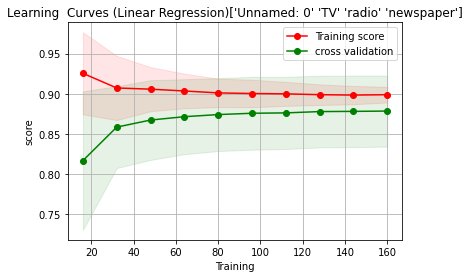

In [68]:
def plot_learning_curve(estimator, title, X, y, ylim=None,cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores= learning_curve(
        estimator, X, y, cv=cv ,n_jobs=n_jobs , train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std  = np.std(train_scores,axis=1)
    test_scores_mean  = np.mean(test_scores,axis=1)
    test_scores_std   = np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color='r',alpha=0.1)
    
    plt.fill_between(train_sizes ,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,color='g',alpha=0.1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-' , color="r",
             label='Training score')
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label='cross validation')
    
    plt.legend(loc='best')
    return plt

X = df.drop(labels=['sales'],axis=1)

y = df['sales']

title = "Learning  Curves (Linear Regression)" + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator , title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

Text(0, 0.5, 'sales')

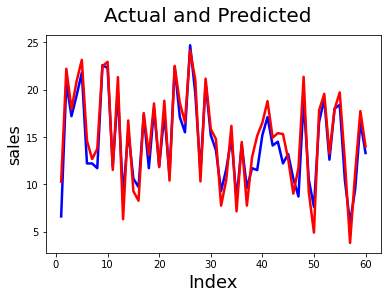

In [69]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('sales', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

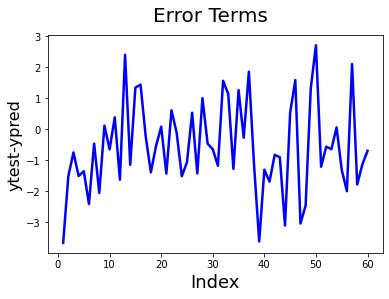

In [70]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('ytest-ypred', fontsize=16)